In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import calculations as calc
import similarity_measures

In [2]:
print(calc.calculate_pointwise_similarity.__doc__)


    Calculate point-wise similarity of all points on a map to a reference point over time

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        lat (int): Latitude of reference point
        lon (int): Longitude of reference point
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
        sim_func (str, optional): The similarity function that should be used.
            Defaults to Pearson's Correlation Coefficient.

    Returns:
        2 dimensional numpy.ndarray with similarity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
#Choose a random point on the map
(lon_index, lat_index) = (np.random.randint(512), np.random.randint(256))
(lon_index, lat_index)

(187, 126)

In [5]:
#Convert to coordinates
lon = nc.variables["longitude"][lon_index]
lat = nc.variables["latitude"][lat_index]

(lon, lat)

(131.48442, 1.0526296)

In [6]:
#Define Level
level = 15

In [7]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [8]:
len(nc.variables["latitude"][:])

256

In [9]:
#Calculate point-wise similarities to (lat, lon) (Here: Correlation Coefficient)
sim = calc.calculate_pointwise_similarity(map_array, lat_index, lon_index, level, sim_func=similarity_measures.correlation_similarity)     
            
sim        

array([[-0.26345425, -0.26764938, -0.27174246, ..., -0.25019091,
        -0.25474143, -0.25914824],
       [-0.2813991 , -0.28559828, -0.28974499, ..., -0.26826174,
        -0.27272084, -0.27708598],
       [-0.29204558, -0.29643095, -0.30078073, ..., -0.278593  ,
        -0.28312275, -0.28760087],
       ...,
       [-0.08044515, -0.08892772, -0.09722982, ..., -0.05386325,
        -0.06291999, -0.07175668],
       [-0.14573846, -0.15496054, -0.16399289, ..., -0.11653742,
        -0.12654586, -0.13625899],
       [-0.20748204, -0.2175521 , -0.22737056, ..., -0.17533124,
        -0.18636308, -0.19707754]])

In [10]:
#2nd possibility: Convert point values into series and calculate series similarity
reference_series = np.array([map_array[time, level, lat_index, lon_index] for time in range(map_array.shape[0])])
sim = calc.calculate_series_similarity(map_array, reference_series, level, sim_func=similarity_measures.correlation_similarity)

sim

array([[-0.26345425, -0.26764938, -0.27174246, ..., -0.25019091,
        -0.25474143, -0.25914824],
       [-0.2813991 , -0.28559828, -0.28974499, ..., -0.26826174,
        -0.27272084, -0.27708598],
       [-0.29204558, -0.29643095, -0.30078073, ..., -0.278593  ,
        -0.28312275, -0.28760087],
       ...,
       [-0.08044515, -0.08892772, -0.09722982, ..., -0.05386325,
        -0.06291999, -0.07175668],
       [-0.14573846, -0.15496054, -0.16399289, ..., -0.11653742,
        -0.12654586, -0.13625899],
       [-0.20748204, -0.2175521 , -0.22737056, ..., -0.17533124,
        -0.18636308, -0.19707754]])

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


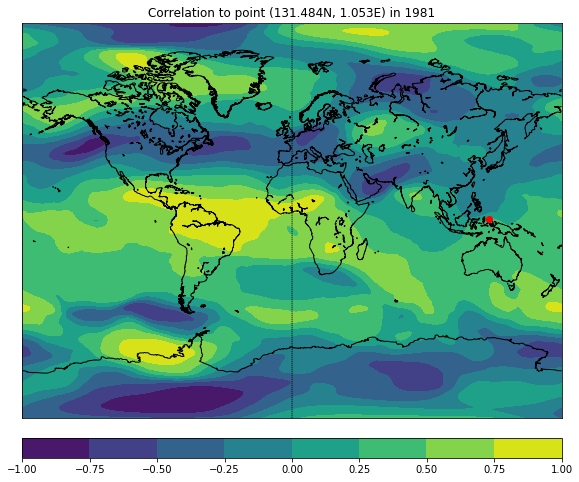

In [11]:
#Plot similarity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=0,resolution='l')
m.drawcoastlines()
m.drawmeridians([0])

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :])
cbar = m.colorbar(cs,location='bottom',pad="5%")

#Draw reference point
x, y = m(lon, lat)
m.scatter(x, y, marker="o", color="r", zorder=5)


plt.title("Correlation to point ({:,.3f}N, {:,.3f}E) in 1981".format(lon, lat))
plt.show()